# Project 1

## Step 1: Open the `sat_scores.csv` file. Investigate the data, and answer the questions below.


##### 1. What does the data describe?

The dataset describes the SAT results per state.  The reported values are a participation rate, and the mean math and verbal scores from 2001.

##### 2. Does the data look complete? Are there any obvious issues with the observations?

The dateset appears complete.  There is also a row representing the data for the entire U.S., which is removed before analysis.

##### 3. Create a data dictionary for the dataset.

1. SAT average scores per state, 2001
2. Data provided by the College Board.
3. Data Attributes:

|Column name      |Data type     |Description
|----------|--------------|-----------|
|State     |String|Two letter abreviation|
|Rate|String|Percent participation|
|Verbal|String|Mean verbal score|
|Math|String|Mean Math score|

## Step 2: Load the data.

##### 4. Load the data into a list of lists

In [129]:
import csv
from pprint import pprint

sat_scores =[]
with open('../assets/sat_scores.csv', 'rU') as f:
    reader = csv.reader(f)
    for row in reader:
        sat_scores.append(row)


##### 5. Print the data

In [130]:

pprint (sat_scores)


[['State', 'Rate', 'Verbal', 'Math'],
 ['CT', '82', '509', '510'],
 ['NJ', '81', '499', '513'],
 ['MA', '79', '511', '515'],
 ['NY', '77', '495', '505'],
 ['NH', '72', '520', '516'],
 ['RI', '71', '501', '499'],
 ['PA', '71', '500', '499'],
 ['VT', '69', '511', '506'],
 ['ME', '69', '506', '500'],
 ['VA', '68', '510', '501'],
 ['DE', '67', '501', '499'],
 ['MD', '65', '508', '510'],
 ['NC', '65', '493', '499'],
 ['GA', '63', '491', '489'],
 ['IN', '60', '499', '501'],
 ['SC', '57', '486', '488'],
 ['DC', '56', '482', '474'],
 ['OR', '55', '526', '526'],
 ['FL', '54', '498', '499'],
 ['WA', '53', '527', '527'],
 ['TX', '53', '493', '499'],
 ['HI', '52', '485', '515'],
 ['AK', '51', '514', '510'],
 ['CA', '51', '498', '517'],
 ['AZ', '34', '523', '525'],
 ['NV', '33', '509', '515'],
 ['CO', '31', '539', '542'],
 ['OH', '26', '534', '439'],
 ['MT', '23', '539', '539'],
 ['WV', '18', '527', '512'],
 ['ID', '17', '543', '542'],
 ['TN', '13', '562', '553'],
 ['NM', '13', '551', '542'],
 ['IL

##### 6. Extract a list of the labels from the data, and remove them from the data.

In [131]:
header_row = summary_row = []
header_row=sat_scores.pop(0)
print (header_row)
summary_row = sat_scores.pop()
print (summary_row)



['State', 'Rate', 'Verbal', 'Math']
['All', '45', '506', '514']


##### 7. Create a list of State names extracted from the data. (Hint: use the list of labels to index on the State column)

In [133]:
state = []
state=[st[0] for st in sat_scores]

##### 8. Print the types of each column

In [134]:
col0_type = type(sat_scores[0][0])
col1_type = type(sat_scores[0][1])
col2_type = type(sat_scores[0][2])
col3_type = type(sat_scores[0][3])
print ("Column 0 ", col0_type)
print ("Column 1 ", col1_type)
print ("Column 2 ", col2_type)
print ("Column 3 ", col3_type)


('Column 0 ', <type 'str'>)
('Column 1 ', <type 'str'>)
('Column 2 ', <type 'str'>)
('Column 3 ', <type 'str'>)


9. Do any types need to be reassigned? If so, go ahead and do it.

The 2nd through 4th columns are numeric values, but are represented as strings.  The values need to be convereted to floats to aid further calculations.

In [6]:
for row in sat_scores:
    row[1] = float(row[1])
    row[2] = float(row[2])
    row[3] = float(row[3])

##### 10. Create a dictionary for each column mapping the State to its respective value for that column. 

In [7]:
for row in sat_scores:
    sat_rate_dict = {row[0]:row[1]  for row in (sat_scores)}
    sat_verbal_dict = {row[0]:row[2] for row in (sat_scores)}
    sat_math_dict = {row[0]:row[3]  for row in (sat_scores)}

##### 11. Create a dictionary with the values for each of the numeric columns

In [135]:
sat_values_dict={col_name:[] for col_name in header_row[1:]}
sat_values_dict['Math'] = sat_math_dict.values()
sat_values_dict['Verbal'] = sat_verbal_dict.values()
sat_values_dict['Rate'] = sat_rate_dict.values()
#print (sat_values_dict)


## Step 3: Describe the data

##### 12. Print the min and max of each column

In [136]:
math_list = verbal_list = rate_list = []
math_list = [data for data in sat_math_dict.values()]
verbal_list = [data for data in sat_verbal_dict.values()]
rate_list = [data for data in sat_rate_dict.values()]

print ("The maximum participation rate is "+  format(max(rate_list),'.0f') +"%.")
print ("The minimum participation rate is "+  format(min(rate_list),'.0f') +"%.")
print ("The highest mean verbal score is " + format(max(verbal_list),'.0f') + ".")
print ("The lowest mean verbal score is " + format(min(verbal_list),'.0f') + ".")
print ("The highest mean math score is " + format(max(math_list),'.0f') + ".")
print ("The lowest mean math score is " + format(min(math_list),'.0f') + ".")

The maximum participation rate is 82%.
The minimum participation rate is 4%.
The highest mean verbal score is 593.
The lowest mean verbal score is 482.
The highest mean math score is 603.
The lowest mean math score is 439.


##### 13. Write a function using only list comprehensions, no loops, to compute Standard Deviation. Print the Standard Deviation of each numeric column.

In [137]:
def std_dev(number_list):
    mean =sum(number_list)/len(number_list)
    variance_list = [(x - mean)**2 for x in number_list]
    value_to_return = (sum(variance_list)/len(variance_list))**(.5)
    return value_to_return

print ("Standard Deviation of Math Means:         " + format(std_dev(math_list),'.2f'))
print ("Standard Deviation of Verbal Means:       " +format(std_dev(verbal_list),'.2f'))
print ("Standard Deviation of Participaion Rates: " + format(std_dev(rate_list),'.2f'))

Standard Deviation of Math Means:         35.93
Standard Deviation of Verbal Means:       33.03
Standard Deviation of Participaion Rates: 27.28


## Step 4: Visualize the data

##### 14. Using MatPlotLib and PyPlot, plot the distribution of the Rate using histograms.

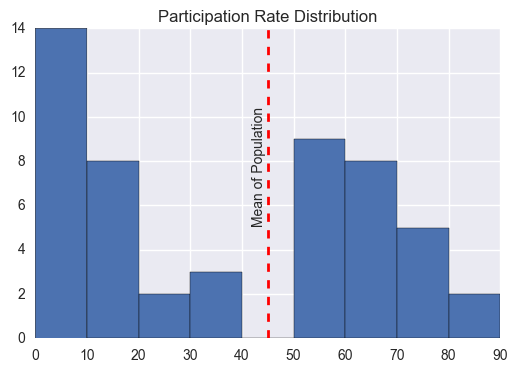

In [138]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

fig = plt.figure()
ax = fig.add_subplot(1,1,1)

rate_hist = ax.hist(rate_list,bins=range(0,100,10))
plt.title("Participation Rate Distribution")
plt.axvline(summary_row[1], color='r', linestyle='dashed', linewidth=2)
plt.text(42,10,'Mean of Population',rotation=90)

plt.show()

##### 15. Plot the Math distribution

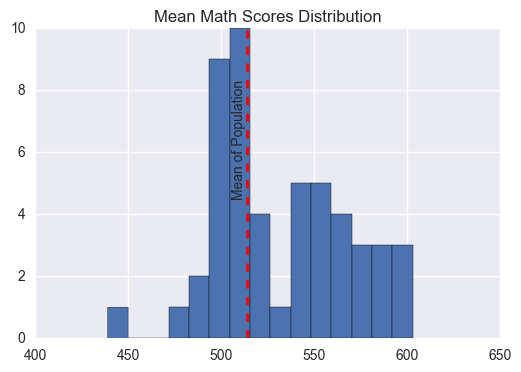

In [95]:
fig2 = plt.figure()
bx = fig2.add_subplot(1,1,1)
plt.axvline(summary_row[3], color='r', linestyle='dashed', linewidth=2)
plt.text(506,8,'Mean of Population',rotation=90)

math_hist = bx.hist(math_list, bins =15)
plt.title("Mean Math Scores Distribution")
plt.show()

##### 16. Plot the Verbal distribution

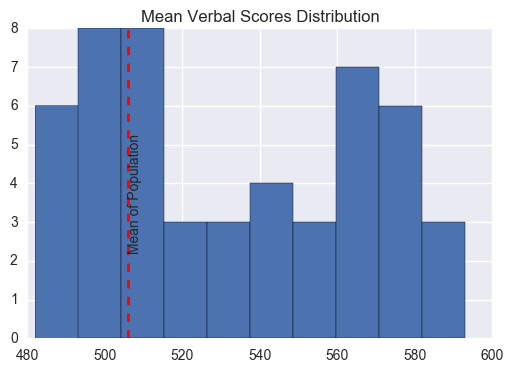

In [139]:
fig3 = plt.figure()
cx = fig3.add_subplot(1,1,1)
plt.axvline(summary_row[2], color='r', linestyle='dashed', linewidth=2)
plt.text(506,5,'Mean of Population',rotation=90)
verbal_hist = cx.hist(verbal_list, bins =10)
plt.title("Mean Verbal Scores Distribution")
plt.show()

##### 17. What is the typical assumption for data distribution?

A normal distribution is the typical assumption.  This would have a strong with a strong peak in the center, where mean and median are nearly identical.

##### 18. Does that distribution hold true for our data?

In [144]:
import numpy as np
import scipy as sp
summary_dict = {'Column':[ 'Mean', 'Meidan', 'Mode']}
for key in header_row[1:]:
    summary_dict[key] = [np.mean(sat_values_dict[key]),\
       np.median( sat_values_dict[key]),\
       sp.stats.mode(sat_values_dict[key])[0][0]]

pprint (summary_dict)    

{'Column': ['Mean', 'Meidan', 'Mode'],
 'Math': [531.84313725490199, 525.0, 499.0],
 'Rate': [37.0, 33.0, 4.0],
 'Verbal': [532.52941176470586, 527.0, 562.0]}


This data does not appear to be a normal distribution.  The mean, median and mode are not identical.  Also, the distributions have 2 peaks, indicating there is a factor separating the states into 2 groups.

##### 19. Plot some scatterplots. **BONUS**: Use a PyPlot `figure` to present multiple plots at once.

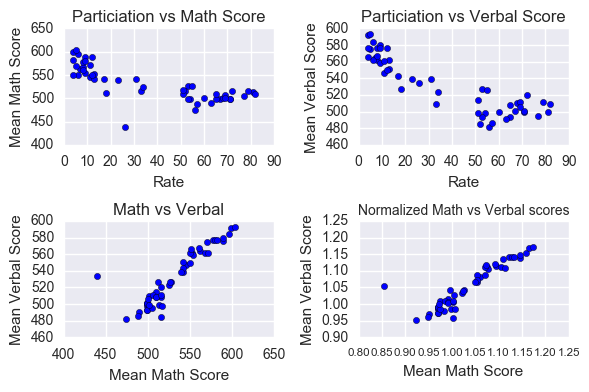

In [104]:
fig4 = plt.figure()
ax = fig4.add_subplot(2,2,1)

rate_math_scatter = ax.scatter(sat_values_dict['Rate'],sat_values_dict['Math'])
plt.title("Particiation vs Math Score")
plt.xlabel('Rate')
plt.ylabel('Mean Math Score')

bx = fig4.add_subplot(2,2,2)
rate_verbal_scatter = bx.scatter(sat_values_dict['Rate'],sat_values_dict['Verbal'])
plt.title("Particiation vs Verbal Score")
plt.ylabel('Mean Verbal Score')
plt.xlabel('Rate')

cx = fig4.add_subplot(2,2,3)
math_verbal_scatter = cx.scatter(sat_values_dict['Math'],sat_values_dict['Verbal'])
plt.title("Math vs Verbal")
plt.xlabel('Mean Math Score')
plt.ylabel('Mean Verbal Score')

dx = fig4.add_subplot(2,2,4)
norm_math_scores = [x/int(summary_row[3]) for x in sat_values_dict['Math']]
norm_verbal_scores = [x/int(summary_row[2]) for x in sat_values_dict['Verbal']]

fit = np.polyfit(norm_math_scores,norm_verbal_scores,1)
fit_fn = np.poly1d(fit) 

math_verbal_scatter = dx.scatter(norm_math_scores,norm_verbal_scores)
plt.title("Normalized Math vs Verbal scores", size='medium')
plt.xlabel('Mean Math Score')
plt.ylabel('Mean Verbal Score')
plt.xticks(size='small')

plt.tight_layout()
plt.show()

##### 20. Are there any interesting relationships to note?

1. The correlation between math and verbal scores is very strong.  
2. There are 2 groups of states.  Where the participation rate is below 50%, the mean math and verbal scores decrease as participation increases.  Above 50% participation, the mean math and verbal scores are mostly independent of participation rate.
3. Ohio is an outlier with a very low math score.  It is the lowest value, by a large margin.  

##### 21. Create box plots for each variable. 

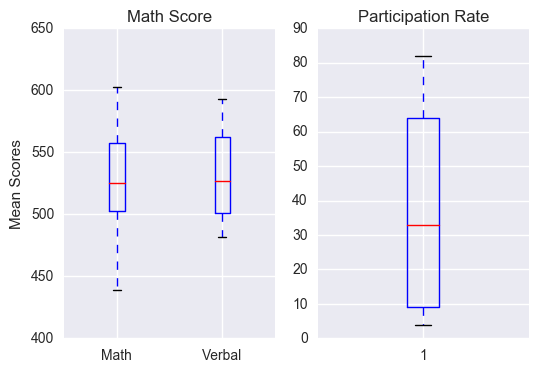

In [118]:
fig5 = plt.figure()
ax = fig5.add_subplot(1,2,1)
rate_rate_box= ax.boxplot([sat_values_dict['Math'],sat_values_dict['Verbal']], labels =['Math', 'Verbal'])
plt.title("Math Score")

plt.ylabel('Mean Scores')

bx = fig5.add_subplot(1,2,2)
rate_rate_box= bx.boxplot(sat_values_dict['Rate'])
plt.title("Participation Rate")


plt.show()

##### BONUS: Using Tableau, create a heat map for each variable using a map of the US. 

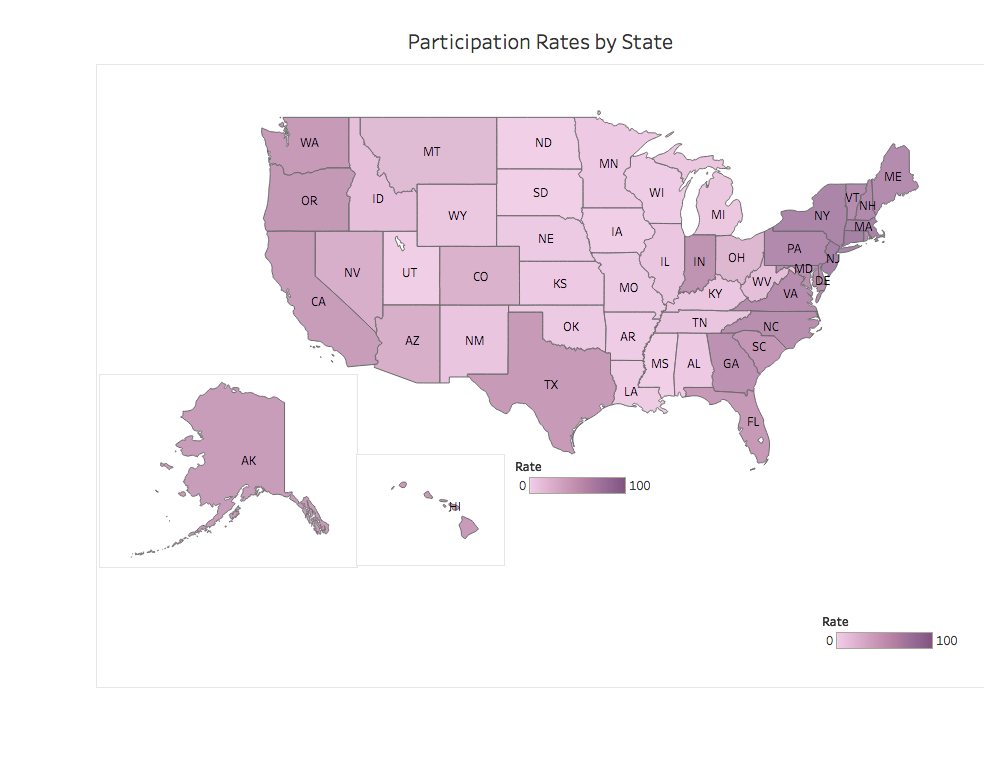

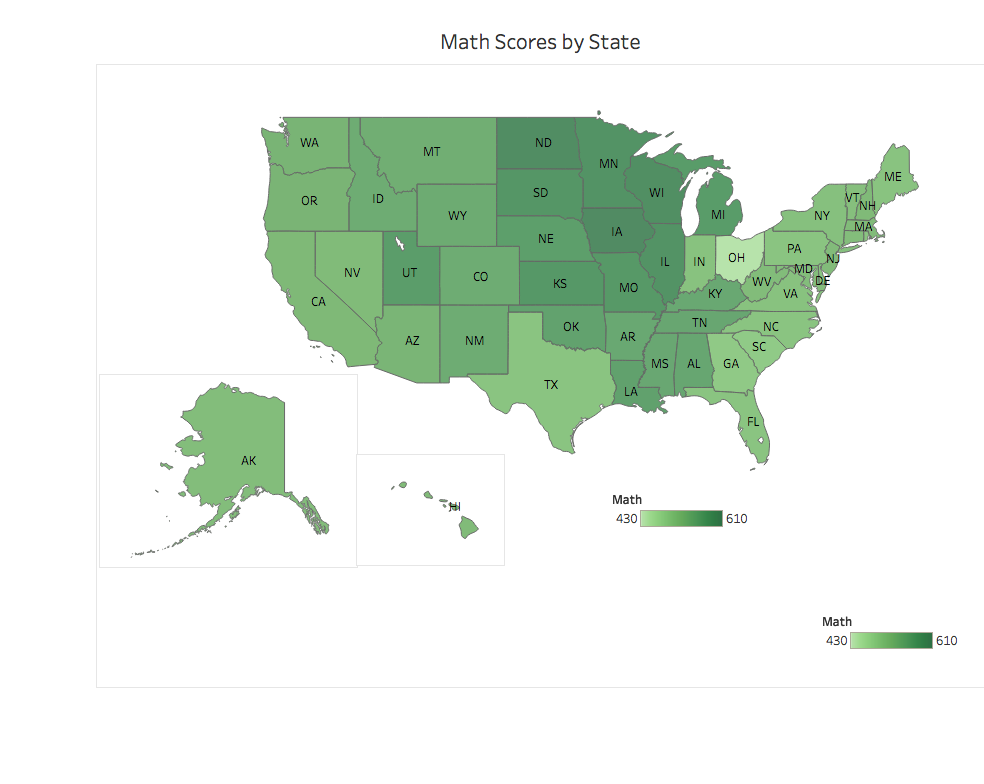

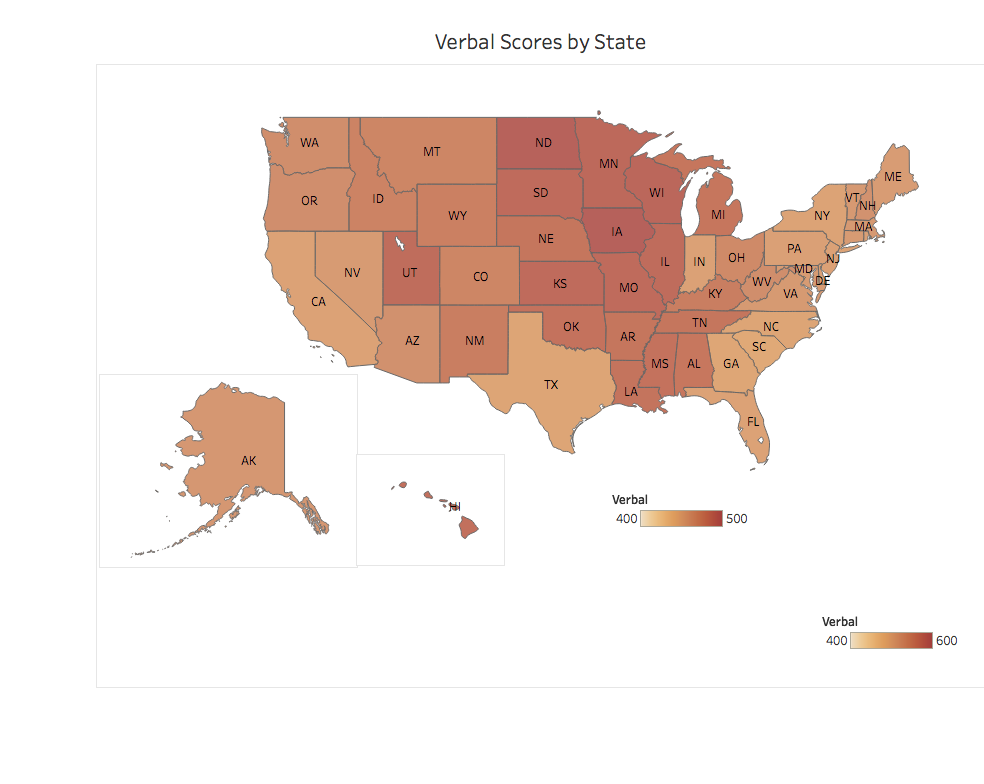

In [128]:
from IPython.display import Image, display
display(Image("rate-state.png"))
display(Image("math-state.png"))
display(Image("verbal-state.png"))